In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv("Logistic_X_Train.csv")
dfy=pd.read_csv("Logistic_Y_Train.csv")

X=dfx.values
Y=dfy.values

print(X.shape)
print(Y.shape)

(3000, 3)
(3000, 1)


In [21]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-1.0*x))

def hypo(query_x,w,b):
    h=np.dot(query_x,w)+b
    return sigmoid(h)

def error(y_true,x,w,b):
    
    m=X.shape[0]
    err=0
    
    for i in range(m):
        hx=hypo(x[i],w,b)
        err+= y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    
    return -err/m

def grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    
    m=x.shape[0]
    
    for i in range(m):
        hx=hypo(x[i],w,b)
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)
        
    grad_w/=m
    grad_b/=m
    
    return [grad_w,grad_b]

#gradient descent for 1 iteration
def getgrad(y_true,x,w,b,lrate=0.5):
    err=error(y_true,x,w,b)
    grad_w,grad_b=grads(y_true,x,w,b)
    
    w+=lrate*grad_w
    b+=lrate*grad_b
    
    return err,w,b

In [22]:
loss=[]
acc=[]

w=np.zeros((X.shape[1]))
b=0.0

In [23]:
for i in range(100):
    e,w,b=getgrad(Y,X,w,b)
    loss.append(e)

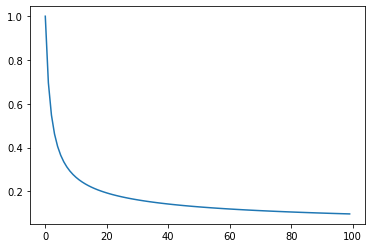

In [24]:
plt.plot(loss)
plt.show()

In [25]:
def predict(x,w,b):
    h=hypo(x,w,b)
    if h>=0.5:
        return 1
    else:
        return 0

In [26]:
dfxtest=pd.read_csv("Logistic_X_Test.csv")
xtest=dfxtest.values
print(xtest.shape)

(1000, 3)


In [28]:
size=int(dfxtest.values.shape[0])
anslist1=[]
id1=[]
cnt=1
for i in range(size):
    query_x=dfxtest.values[i]
    query_x=np.append(query_x,1)
    x=int(predict(xtest[i],w,b))
    anslist1.append(x)
    id1.append(cnt)
    cnt+=1

In [30]:
dict={"label" : anslist1}
df = pd.DataFrame(dict)  
df.to_csv('predict_logist_reg.csv',index_label=None,index=False)